## test
- test1
- $\frac{1}{2}$, $|\psi \rangle$

In [2]:
print('1')

1


print('1')

In [3]:
import qiskit
qiskit.__version__

'1.2.0'

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService

MY_API_TOKEN="709891969651728709a739754819bc22316619f8aa85c74bcb6ec9bd5a35a28f666674530435d4266605ac378f7aa00d8b80831755a894b61b6622e0c505217c"

QiskitRuntimeService.save_account(channel="ibm_quantum",
                                 token=MY_API_TOKEN)

service = QiskitRuntimeService(channel="ibm_quantum")

In [6]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [56]:
from qiskit import QuantumCircuit

bell = QuantumCircuit(2)

bell.h(0)
bell.cx(0,1)

bell.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [11]:
bell_meas = bell.copy()
bell_meas.measure_all()
bell_meas.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [20]:
from qiskit_aer import StatevectorSimulator

simulator = StatevectorSimulator()

job = simulator.run(bell)

result = job.result()

state_vec = result.get_statevector()

display(state_vec)
state_vec.draw('latex')

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

{'00': 500, '11': 524}


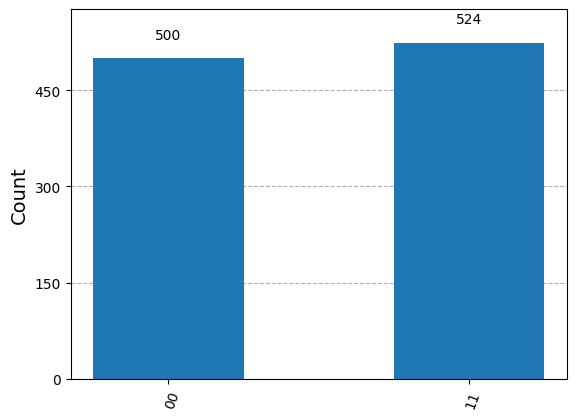

In [14]:
from qiskit import transpile
from qiskit_aer import QasmSimulator
from qiskit.visualization import plot_histogram

simulator = QasmSimulator()

compiled_circuit = transpile(bell_meas, simulator)

job = simulator.run(compiled_circuit, shot=1024)

result = job.result()

counts = result.get_counts()

print(counts)
plot_histogram(counts)

In [21]:
from qiskit_aer import UnitarySimulator

simulator = UnitarySimulator()

job = simulator.run(bell)

result = job.result()

operator = result.get_unitary()

operator.draw('latex')

<IPython.core.display.Latex object>

In [57]:
from qiskit.quantum_info import Pauli

ZI = Pauli('ZI')
IZ = Pauli('IZ')
ZZ = Pauli('ZZ')
XI = Pauli('XI')
IX = Pauli('IX')
XX = Pauli('XX')

observables = [ZI, IZ, ZZ, XI, IX, XX]
#display(state_vec)
bell.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [58]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()
job = estimator.run([bell] * len(observables), observables, shots=1024^2)
job.result()

EstimatorResult(values=array([ 0.01949318,  0.01949318,  1.        , -0.01949318, -0.01949318,
        1.        ]), metadata=[{'shots': 1026, 'variance': 0.9996200160353234, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0067589, 'sample_measure_time': 0.0034834, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 8050, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 4, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1026, 'variance': 0.9996200160353234, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0067589, 'sample_measure_

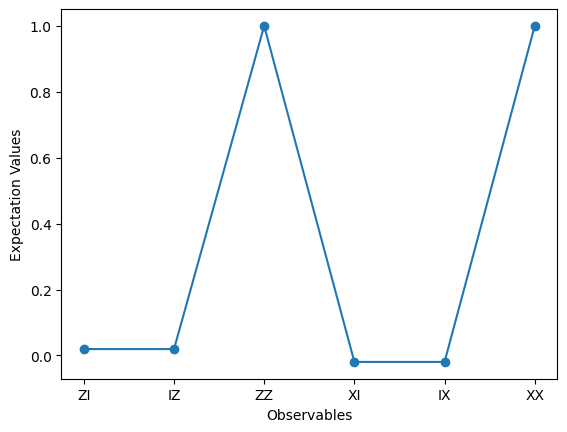

In [59]:
import matplotlib.pyplot as plt

data = ['ZI', 'IZ', 'ZZ', 'XI', 'IX', 'XX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation Values')
plt.show()

## Real Backend

In [27]:
from dataclasses import asdict
from qiskit_ibm_runtime import SamplerV2 as Sampler

backend = service.least_busy(operational=True, simulator=False, min_num_qubits=3)

In [28]:
backend

<IBMBackend('ibm_sherbrooke')>

In [29]:
sampler = Sampler(backend, options={"default_shots": 1024})

sampler.options.dynamical_decoupling.enable = True
sampler.options.twirling.enable_gates = True

sampler.options.update(dynamical_decoupling={"sequence_type": "XpXm"})

print(asdict(sampler.options))

{'_VERSION': 2, 'max_execution_time': Unset, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': None, 'private': False}, 'simulator': {'noise_model': Unset, 'seed_simulator': Unset, 'coupling_map': Unset, 'basis_gates': Unset}, 'default_shots': 1024, 'dynamical_decoupling': {'enable': True, 'sequence_type': 'XpXm', 'extra_slack_distribution': Unset, 'scheduling_method': Unset}, 'execution': {'init_qubits': Unset, 'rep_delay': Unset, 'meas_type': Unset}, 'twirling': {'enable_gates': True, 'enable_measure': Unset, 'num_randomizations': Unset, 'shots_per_randomization': Unset, 'strategy': Unset}, 'experimental': Unset}


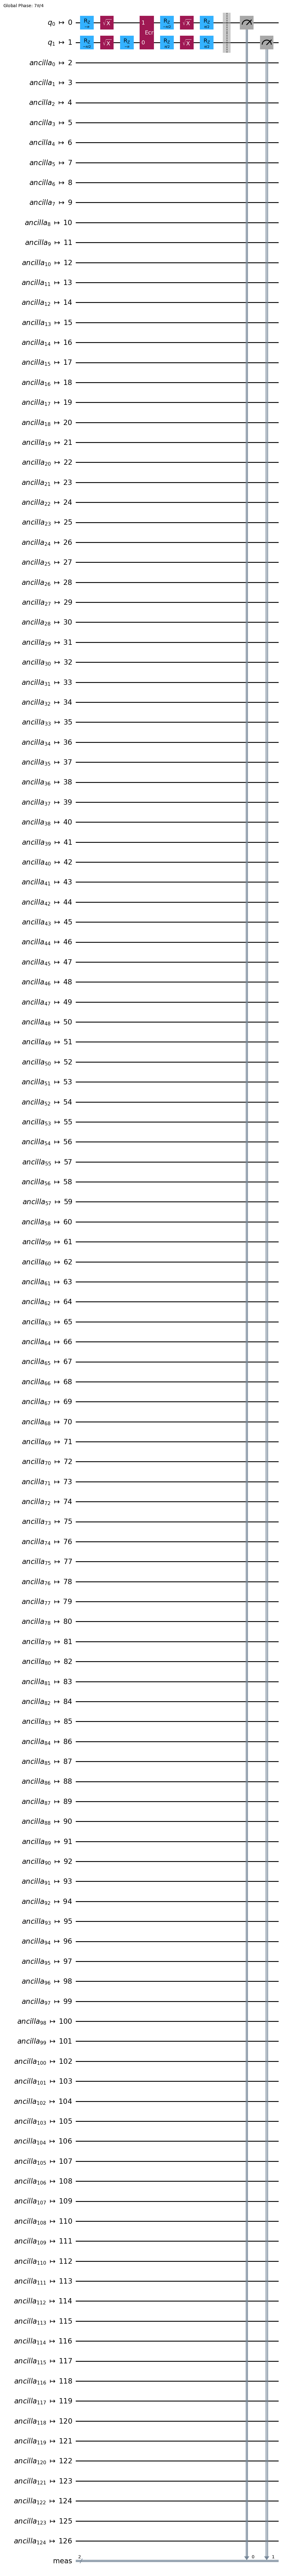

In [31]:
bell_circuit = transpile(bell_meas, backend)
bell_circuit.draw('mpl')

In [33]:
job = sampler.run([bell_circuit], shots=1024)

In [38]:
print(f"Job {job.job_id()} is still running: {job.status() == "RUNNING"}")

Job cvpp944zrwzg008atm30 is still running: False


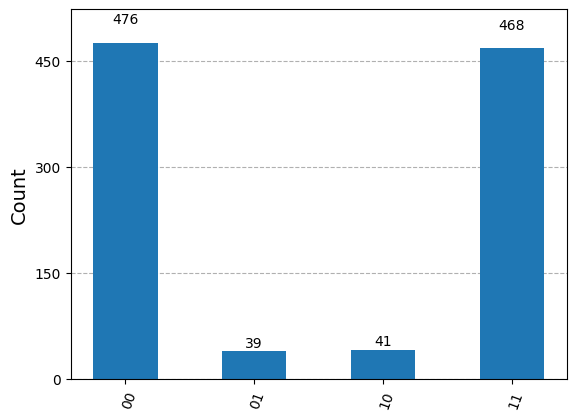

In [40]:
result = job.result()
counts = result[0].data.meas.get_counts()
plot_histogram(counts)

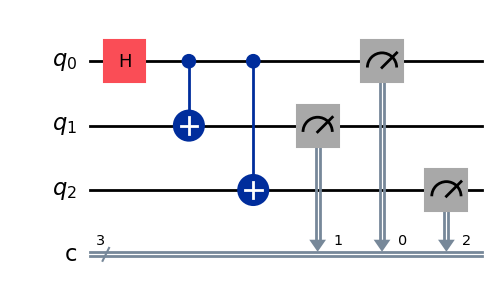

In [41]:
ghz = QuantumCircuit(3, 3)

ghz.h(0)
ghz.cx(0,1)
ghz.cx(0,2)
ghz.measure([0,1,2],[0,1,2])
ghz.draw('mpl')

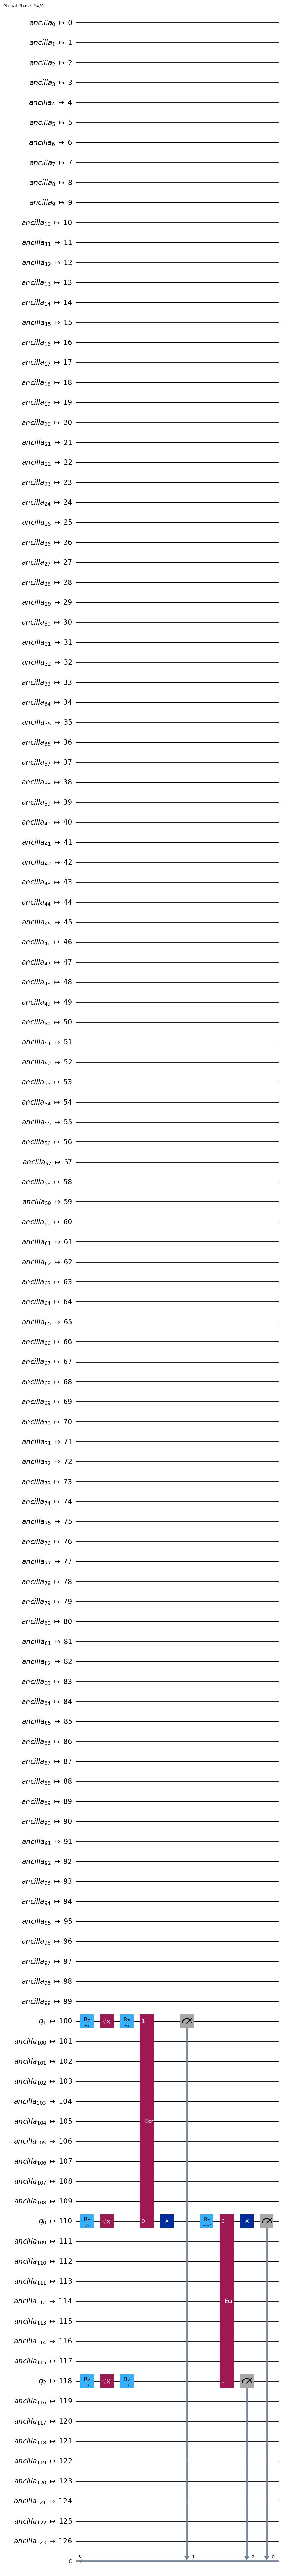

In [42]:
ghz_circuit = transpile(ghz, backend)
ghz_circuit.draw('mpl')

In [43]:
job = sampler.run([ghz_circuit], shots=1024)

In [44]:
print(job.job_id(), job.status())

cvpshpp55th0008rq5jg QUEUED


In [62]:
job_id = 'cvpshpp55th0008rq5jg'
job = service.job(job_id)

In [63]:
print(job.job_id(), job.status())

cvpshpp55th0008rq5jg DONE


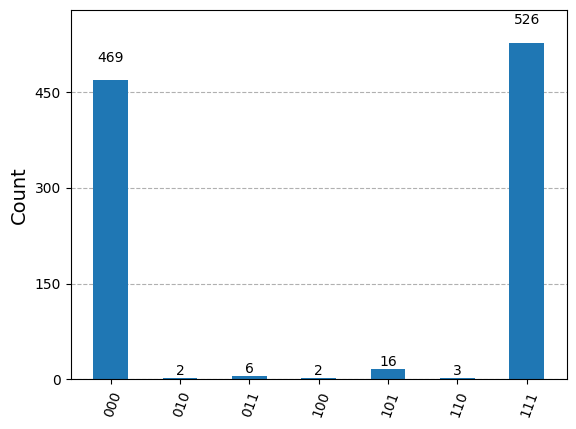

In [64]:
result = job.result()
counts = result[0].data.c.get_counts()
plot_histogram(counts)